# Physik der sozio-ökonomischen Systeme mit dem Computer
# (Physics of Socio-Economic Systems with the Computer)

### Vorlesung gehalten an der J.W.Goethe-Universität in Frankfurt am Main 
#### (Wintersemester 2025/26)

### von Dr.phil.nat. Dr.rer.pol. Matthias Hanauske

### Frankfurt am Main 22.08.2025

## Erster Vorlesungsteil:  
### Die R&auml;uber-Beute Gleichung im Kontext der evolutionären Spieltheorie

<p>
Die <i>R&auml;uber Beute Gleichung</i> hat Ihren Ursprung im Fachgebiet der Populations&ouml;kologie (bzw. Populations-/Evolutionsbiologie). In der &Ouml;kologie werden die Beziehungen/Interaktionen von Lebewesen (Organismen) untereinander und zu ihrer unbelebten Umwelt untersucht. Die zeitliche Entwicklung der einzelnen Populationsgr&ouml;&szlig;en ist Gegenstand der Populations- und Evolutionsbiologie, welche ihren mathematischen Ansatz in der sogenannten <i>R&auml;uber-Beute Gleichung</i> (Lotka-Volterra Gleichung) findet. Die R&auml;uber-Beute Gleichung beschreibt den nat&uuml;rlichen &Uuml;berlebenskampf mehrerer Spezies, die einander auffressen. Dabei ern&auml;hrt sich die Population der R&auml;uberwesen von der Population der Beutewesen und sinkt die Anzahl der Beutewesen, so erniedrigt sich die Reproduktionsrate der R&auml;uberwesen, da diese Hunger erleiden m&uuml;ssen. 
</p>

<p>
Die R&auml;uber-Beute-Gleichung f&uuml;r $n$-Populationen ist durch das folgende System von Differentialgleichungen definiert

\begin{equation}
\frac{d X_i(t)}{dt} = \left( r_i + \sum_{j=1}^{n} b_{ij}\, X_j(t)  \right) X_i(t) \quad ,
\end{equation}

wobei $X_i(t)$ die Anzahl der Lebewesen in der Population i zur Zeit $t$ beschreibt, $r_i$ die Werte der intrinsischen Reproduktion-Sterberaten der Population i sind (wie viele Lebewesen der Population i werden pro Zeiteinheit $dt$ geboren minus die pro Zeiteinheit versterbenden Lebewesen der Population i) und $b_{ij}$ die Interaktionsmatrix der Population i zur Population j darstellt (Erh&ouml;hung der Reproduktionsrate der R&auml;uber pro Beutelebewesen bzw. Erniedrigung der Reproduktionsrate der Beutetiere pro R&auml;uberlebewesen). Details finden Sie z.B. in den unten angegebenen B&uuml;chern von Hofbauer/Sigmund und Nowak. Das betrachtete Problem stellt ein System von $n$ gekoppelten Differentialgleichungen erster Ordnung dar (Struktur einer sogenannten <i>Lotka-Volterra Gleichung</i>) und kann mittels der in dieser Vorlesung erlernten numerischen Verfahren gel&ouml;st werden.
</p>

<p>
Die Räuber-Beute-Gleichung (Lotka-Volterra Gleichung) für n-Populationen lässt sich auf ein symmetrisches evolutionäres Spiel mit $m=n+1$ Strategien abbilden, welches, wie in der Vorlesung gezeigt, durch das folgende System von Differentialgleichungen beschrieben wird (siehe Sigmund/Hofbauer S:77 bzw. Novak "Evolutionary dynamics", p.68). 
    
$$
\begin{equation}
\frac{d x_i}{dt} =   \left( \sum_{j=1}^{m} \$_{ij} \, x_j - \sum_{k=1}^{m} \sum_{j=1}^{m} \$_{kj} \, x_k \, x_j \right) \, x_i
\end{equation}
$$
    
Dieses Jupyter Notebook befasst sich zunächst mit dem Räuber-Beute-Spiel zweier Populationen (Anzahl der Strategien m=3, entspricht N=2 Populationen) und berechnet dessen Lösungen in einem evolutionären, zeitabhängigen Kontext.
</p>

#### Weitere Links
<p>
<ul>
   <li>Hofbauer, Josef, and Karl Sigmund. Evolutionary games and population dynamics. Cambridge university press, 1998</li>
   <li><A href="http://www.hup.harvard.edu/catalog.php?isbn=9780674023383" target=blank>Martin A. Nowak, Evolutionary Dynamics - Exploring the Equations of Life, 2006</A></li>
   <li><A href="https://itp.uni-frankfurt.de/~hanauske/VPSOC/T1/maple/I-2-5/LotkaVolterra1.html" target="_blank">Maple Worksheet: Die Populations&ouml;kologie (bzw. Populations-/Evolutionsbiologie) als Anwendungsfeld der evolution&auml;ren Spieltheorie</A></li>
   <li><A href="https://github.com/NGoetz/Snow" target=blank>Niklas G&ouml;tz, Individuenbasierte R&auml;uber-Beute-Simulation</A></li>
</ul>
</p>

#### Numerische Lösung der R&auml;uber-Beute Gleichung

Wir betrachten im Folgenden die numerische Lösung der R&auml;uber-Beute Gleichung für zwei Populationen ($n=2$) und verwenden zunächst die folgenden Werte für die Interaktionsmatrix $b_{ij}$ ($b_{11}=-0.01$, $b_{12}=-0.02$, $b_{21}=0.25$ und $b_{22}=-0.05$) und intrinsischen Reproduktion-Sterberaten ($r_1=0.9$ und $r_2=-0.8$). Aufgrund der Anordnung der Werte handelt es sich bei der ersten Population $X_1$ um die Beutewesen und $X_2$ gibt hingegen die Anzahl der R&auml;uberwesen an.

In [1]:
n=2
r = [0.9,-0.8]
b = [[-0.01,-0.02],[0.25,-0.05]]

Zum numerischen Lösen des Systems der Differentialgleichungen lesen wir die folgenden Pythonmodule ein:

In [2]:
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib import rcParams
import matplotlib.gridspec as gridspec
from scipy.integrate import solve_ivp
rcParams.update({
    'figure.figsize'    : [11,5],
    'axes.titlesize' : 14,
    'axes.labelsize' : 16,  
    'xtick.labelsize' : 14 ,
    'ytick.labelsize' : 14 
})

Wir definieren das System der Differentialgleichungen, welches die R&auml;uber-Beute-Gleichung bestimmt:

\begin{equation}
\frac{d X_i(t)}{dt} = \left( r_i + \sum_{j=1}^{n} b_{ij}\, X_j(t)  \right) X_i(t) 
\end{equation}

In [3]:
def DGLsys(t,X_vec):
    dX_dt = []
    for i in range(0,n):
        dX_dt.append(r[i]*X_vec[i]+sum(b[i][j]*X_vec[j] for j in range(n))*X_vec[i])
    return dX_dt

Wir legen die Anzahl der R&auml;uber- und Beutewesen zur Anfangszeit fest ($X_1(0)=15$, $X_2(0)=8$) und lösen im Zeitbereich $t \in [0,7]$ das DGL-System numerisch.

In [4]:
t_end=7
x_init = [15,8]

fehler = 10**(-13)
N=10000
t_val = np.linspace(0, t_end, N+1)
Loes = solve_ivp(DGLsys, [0, t_end], x_init, t_eval=t_val, rtol=fehler, atol=fehler)
Loes_B1=Loes

Die numerischen Lösungen der zeitlichen Entwicklung der R&auml;uber- und Beutewesen stellen wir grafisch dar:

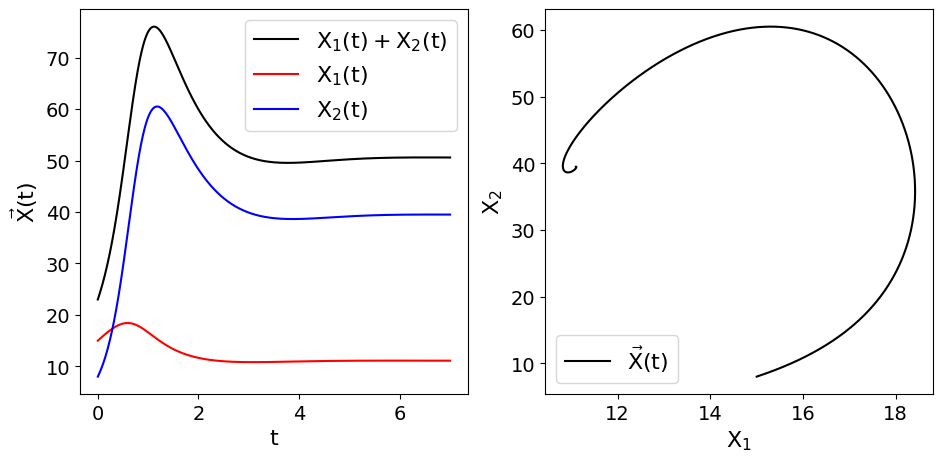

In [5]:
fig = plt.figure()
gs = gridspec.GridSpec(1, 2, width_ratios=[1,1], wspace=0.2)
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])

ax1.set_xlabel(r"$\rm t$")
ax1.set_ylabel(r"$\rm \vec{X}(t)$")
ax1.plot(Loes.t, Loes.y[0]+Loes.y[1],c="black", label=r"$\rm X_1(t)+X_2(t)$");
ax1.plot(Loes.t, Loes.y[0],c="red", label=r"$\rm X_1(t)$");
ax1.plot(Loes.t, Loes.y[1],c="blue", label=r"$\rm X_2(t)$");
ax1.legend(loc='upper right',fontsize=16);

ax2.set_xlabel(r"$\rm X_1$")
ax2.set_ylabel(r"$\rm X_2$")
ax2.plot(Loes.y[0], Loes.y[1],c="black", label=r"$\rm \vec{X}(t)$");
ax2.legend(loc='lower left',fontsize=16);

Die oberen Abbildungen zeigen, dass sich nach dem Start der Simulation die Anzahl der Räuberwesen schnell von acht auf 60 erhöht und dann wieder auf ca. 40 Wesen abfällt, bei dem sie dann stabil verharrt. Auch die Anzahl der Beutewesen nimmt am Anfang leicht zu und sinkt dann auf den stabilen Wert von ca. 11 ab. Die gesamte Anzahl der R&auml;uber-Beutewesen nimmt dabei zunächst stark zu (Maximalwert 76 Wesen) und sinkt dann auf den stabilen Wert von ca. 51 ab (siehe schwarze Kurve in der oberen linken Abbildung). Mathematisch endet das R&auml;uber-Beute-System, unabhängig von dem Anfangswert der Populationen, in dem Fixpunkt $\vec{X}=[11.096,39.496]$. Dies wollen wir im Folgenden zeigen, indem wir die zeitliche Entwicklung für zwei weitere Anfangswerte untersuchen und grafisch darstellen ($X_1(0)=18$, $X_2(0)=5$ und $X_1(0)=10$, $X_2(0)=20$).

In [6]:
x_init_a = [18,5]
x_init_b = [10,20]

Loes_a = solve_ivp(DGLsys, [0, t_end], x_init_a, t_eval=t_val, rtol=fehler, atol=fehler)
Loes_b = solve_ivp(DGLsys, [0, t_end], x_init_b, t_eval=t_val, rtol=fehler, atol=fehler)

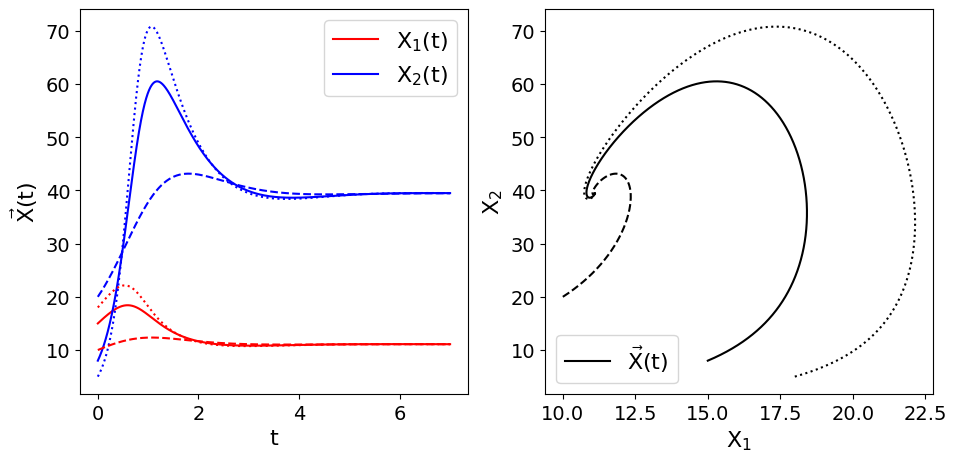

In [7]:
fig = plt.figure()
gs = gridspec.GridSpec(1, 2, width_ratios=[1,1], wspace=0.2)
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])

ax1.set_xlabel(r"$\rm t$")
ax1.set_ylabel(r"$\rm \vec{X}(t)$")
ax1.plot(Loes.t, Loes.y[0],c="red", label=r"$\rm X_1(t)$");
ax1.plot(Loes.t, Loes.y[1],c="blue", label=r"$\rm X_2(t)$");
ax1.plot(Loes_a.t, Loes_a.y[0],c="red",linestyle=":");
ax1.plot(Loes_a.t, Loes_a.y[1],c="blue",linestyle=":");
ax1.plot(Loes_b.t, Loes_b.y[0],c="red",linestyle="--");
ax1.plot(Loes_b.t, Loes_b.y[1],c="blue",linestyle="--");
ax1.legend(loc='upper right',fontsize=16);

ax2.set_xlabel(r"$\rm X_1$")
ax2.set_ylabel(r"$\rm X_2$")
ax2.plot(Loes.y[0], Loes.y[1],c="black", label=r"$\rm \vec{X}(t)$");
ax2.plot(Loes_a.y[0], Loes_a.y[1],c="black",linestyle=":");
ax2.plot(Loes_b.y[0], Loes_b.y[1],c="black",linestyle="--");
ax2.legend(loc='lower left',fontsize=16);

Die obere Abbildung zeigt, dass die zeitliche Entwicklung nicht von den Anfangswerten abhängt. Neben der absoluten Anzahl von R&auml;uber-Beutewesen ist es auch interessant sich das relative Verhältnis der R&auml;uber-Beutewesen zu veranschaulichen ($\vec{X}/|\vec{X}|$).

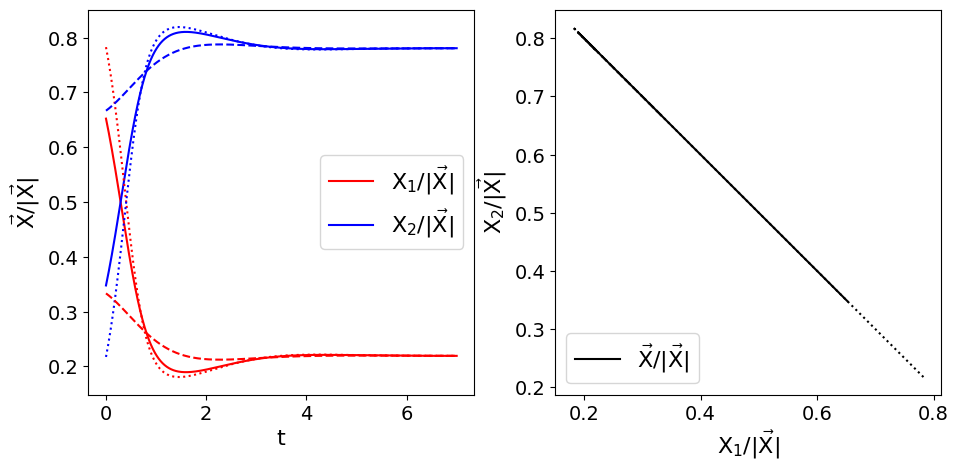

In [8]:
fig = plt.figure()
gs = gridspec.GridSpec(1, 2, width_ratios=[1,1], wspace=0.21)
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])

ax1.set_xlabel(r"$\rm t$")
ax1.set_ylabel(r"$\rm \vec{X}/|\vec{X}|$")
ax1.plot(Loes.t, Loes.y[0]/(Loes.y[0]+Loes.y[1]),c="red", label=r"$\rm X_1/|\vec{X}|$");
ax1.plot(Loes.t, Loes.y[1]/(Loes.y[0]+Loes.y[1]),c="blue", label=r"$\rm X_2/|\vec{X}|$");
ax1.plot(Loes_a.t, Loes_a.y[0]/(Loes_a.y[0]+Loes_a.y[1]),c="red",linestyle=":");
ax1.plot(Loes_a.t, Loes_a.y[1]/(Loes_a.y[0]+Loes_a.y[1]),c="blue",linestyle=":");
ax1.plot(Loes_b.t, Loes_b.y[0]/(Loes_b.y[0]+Loes_b.y[1]),c="red",linestyle="--");
ax1.plot(Loes_b.t, Loes_b.y[1]/(Loes_b.y[0]+Loes_b.y[1]),c="blue",linestyle="--");
ax1.legend(loc='center right',fontsize=16);

ax2.set_xlabel(r"$\rm X_1/|\vec{X}|$")
ax2.set_ylabel(r"$\rm X_2/|\vec{X}|$")
ax2.plot(Loes.y[0]/(Loes.y[0]+Loes.y[1]), Loes.y[1]/(Loes.y[0]+Loes.y[1]),c="black", label=r"$\rm \vec{X}/|\vec{X}|$");
ax2.plot(Loes_a.y[0]/(Loes_a.y[0]+Loes_a.y[1]), Loes_a.y[1]/(Loes_a.y[0]+Loes_a.y[1]),c="black",linestyle=":");
ax2.plot(Loes_b.y[0]/(Loes_b.y[0]+Loes_b.y[1]), Loes_b.y[1]/(Loes_b.y[0]+Loes_b.y[1]),c="black",linestyle="--");
ax2.legend(loc='lower left',fontsize=16);

Wir veranschaulichen uns die zeitliche Entwicklung einer der Simulationen in einer Animation.

In [9]:
import matplotlib.animation as animation
from IPython.display import HTML

In [10]:
step = 150
fig = plt.figure(figsize=(10, 5))
gs = gridspec.GridSpec(1, 2, width_ratios=[1,1], wspace=0.24)
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])
ax1.plot(Loes.t, Loes.y[0]/(Loes.y[0]+Loes.y[1]),c="red", label=r"$\rm X_1/|\vec{X}|$");
ax1.plot(Loes.t, Loes.y[1]/(Loes.y[0]+Loes.y[1]),c="blue", label=r"$\rm X_2/|\vec{X}|$");

def animate(i):
    ax2.cla() 
    ax1.set_xlabel(r"$\rm t$")
    ax1.set_ylabel(r"$\rm \vec{X}/|\vec{X}|$")
    ax2.set_xlabel(r"$\rm X_1/|\vec{X}|$")
    ax2.set_ylabel(r"$\rm X_2/|\vec{X}|$")
    ax1.legend(loc='center right',fontsize=16);
    ax1.scatter(Loes.t[step*i], Loes.y[0][step*i]/(Loes.y[0][step*i]+Loes.y[1][step*i]), c="red", s=20)
    ax1.scatter(Loes.t[step*i], Loes.y[1][step*i]/(Loes.y[0][step*i]+Loes.y[1][step*i]), c="blue", s=20)
    ax2.plot(Loes.y[0]/(Loes.y[0]+Loes.y[1]), Loes.y[1]/(Loes.y[0]+Loes.y[1]),c="black");
    ax2.scatter(Loes.y[0][step*i]/(Loes.y[0][step*i]+Loes.y[1][step*i]), Loes.y[1][step*i]/(Loes.y[0][step*i]+Loes.y[1][step*i]),c="green", s=40)
    return fig,

ani = animation.FuncAnimation(fig,animate,frames=50,interval=500)
plt.close(ani._fig)
HTML(ani.to_html5_video())

Wir betrachten nun die numerische Lösung eines weiteren Parametersatzes und verwenden die folgenden Werte für die Interaktionsmatrix $b_{ij}$ ($b_{11}=-0.01$, $b_{12}=-0.09$, $b_{21}=0.4$ und $b_{22}=-0.01$) und intrinsischen Reproduktion-Sterberaten ($r_1=0.8$ und $r_2=-0.5$). 

In [11]:
r = [0.8,-0.5]
b = [[-0.01,-0.09],[0.4,-0.01]]

In [12]:
def DGLsys(t,X_vec):
    dX_dt = []
    for i in range(0,n):
        dX_dt.append(r[i]*X_vec[i]+sum(b[i][j]*X_vec[j] for j in range(n))*X_vec[i])
    return dX_dt

Wir legen wieder die Anzahl der R&auml;uber- und Beutewesen zur Anfangszeit fest und lösen, im Zeitbereich $t \in [0,40]$ das DGL-System numerisch.

In [13]:
t_end=40
t_val = np.linspace(0, t_end, N+1)
x_init = [15,8]
x_init_a = [18,5]
x_init_b = [10,20]

Loes = solve_ivp(DGLsys, [0, t_end], x_init, t_eval=t_val, rtol=fehler, atol=fehler)
Loes_a = solve_ivp(DGLsys, [0, t_end], x_init_a, t_eval=t_val, rtol=fehler, atol=fehler)
Loes_b = solve_ivp(DGLsys, [0, t_end], x_init_b, t_eval=t_val, rtol=fehler, atol=fehler)
Loes_B2=Loes

Die numerischen Lösungen der zeitlichen Entwicklung der R&auml;uber- und Beutewesen stellen wir wieder grafisch dar:

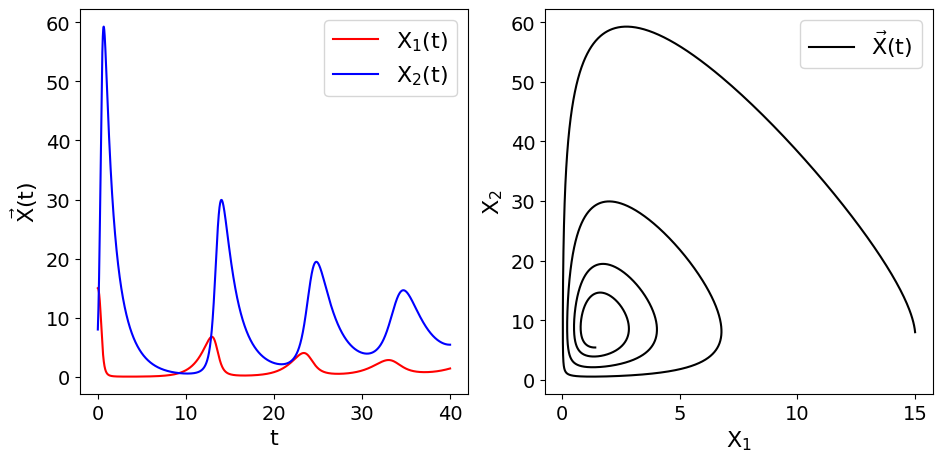

In [14]:
fig = plt.figure()
gs = gridspec.GridSpec(1, 2, width_ratios=[1,1], wspace=0.2)
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])

ax1.set_xlabel(r"$\rm t$")
ax1.set_ylabel(r"$\rm \vec{X}(t)$")
ax1.plot(Loes.t, Loes.y[0],c="red", label=r"$\rm X_1(t)$");
ax1.plot(Loes.t, Loes.y[1],c="blue", label=r"$\rm X_2(t)$");
ax1.legend(loc='upper right',fontsize=16);

ax2.set_xlabel(r"$\rm X_1$")
ax2.set_ylabel(r"$\rm X_2$")
ax2.plot(Loes.y[0], Loes.y[1],c="black", label=r"$\rm \vec{X}(t)$");
ax2.legend(loc='upper right',fontsize=16);

Die zeitliche Entwicklung hängt wieder nicht von den Anfangswerten ab:

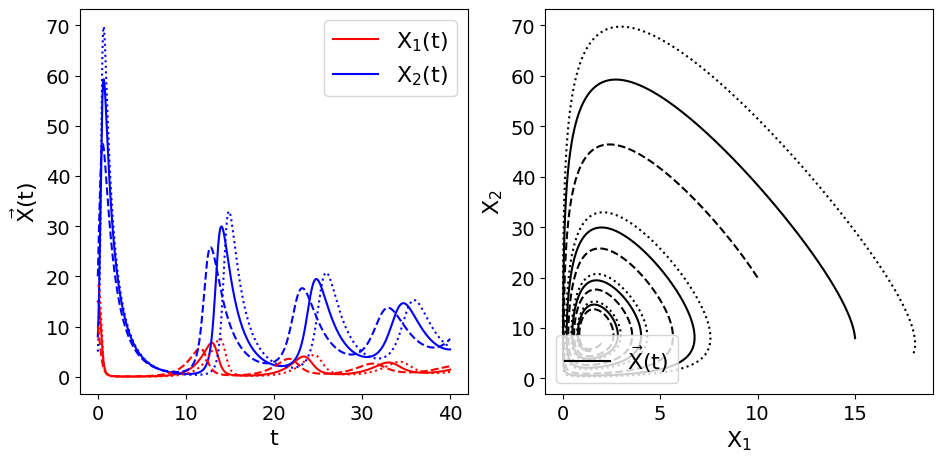

In [15]:
fig = plt.figure()
gs = gridspec.GridSpec(1, 2, width_ratios=[1,1], wspace=0.2)
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])

ax1.set_xlabel(r"$\rm t$")
ax1.set_ylabel(r"$\rm \vec{X}(t)$")
ax1.plot(Loes.t, Loes.y[0],c="red", label=r"$\rm X_1(t)$");
ax1.plot(Loes.t, Loes.y[1],c="blue", label=r"$\rm X_2(t)$");
ax1.plot(Loes_a.t, Loes_a.y[0],c="red",linestyle=":");
ax1.plot(Loes_a.t, Loes_a.y[1],c="blue",linestyle=":");
ax1.plot(Loes_b.t, Loes_b.y[0],c="red",linestyle="--");
ax1.plot(Loes_b.t, Loes_b.y[1],c="blue",linestyle="--");
ax1.legend(loc='upper right',fontsize=16);

ax2.set_xlabel(r"$\rm X_1$")
ax2.set_ylabel(r"$\rm X_2$")
ax2.plot(Loes.y[0], Loes.y[1],c="black", label=r"$\rm \vec{X}(t)$");
ax2.plot(Loes_a.y[0], Loes_a.y[1],c="black",linestyle=":");
ax2.plot(Loes_b.y[0], Loes_b.y[1],c="black",linestyle="--");
ax2.legend(loc='lower left',fontsize=16);

In der folgenden Abbildung stellen wir zusätzlich auch das relative Verhältnis der R&auml;uber-Beutewesen ($\vec{X}/|\vec{X}|$) dar.

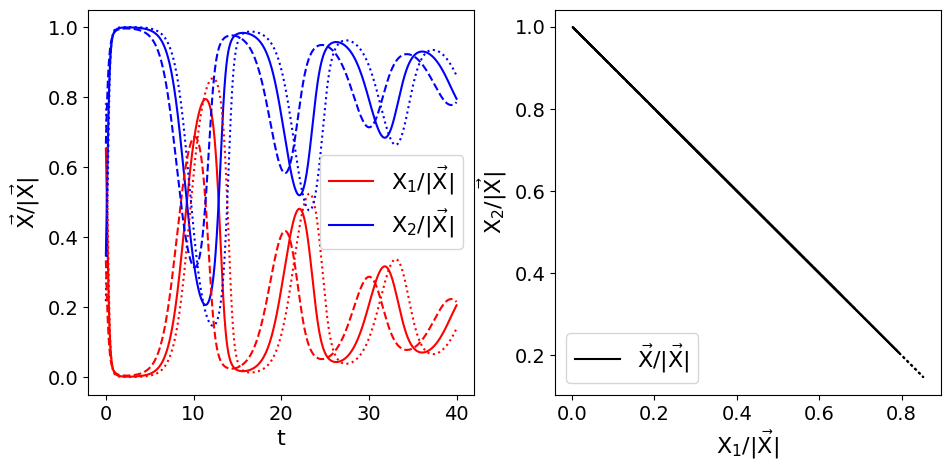

In [16]:
fig = plt.figure()
gs = gridspec.GridSpec(1, 2, width_ratios=[1,1], wspace=0.21)
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])

ax1.set_xlabel(r"$\rm t$")
ax1.set_ylabel(r"$\rm \vec{X}/|\vec{X}|$")
ax1.plot(Loes.t, Loes.y[0]/(Loes.y[0]+Loes.y[1]),c="red", label=r"$\rm X_1/|\vec{X}|$");
ax1.plot(Loes.t, Loes.y[1]/(Loes.y[0]+Loes.y[1]),c="blue", label=r"$\rm X_2/|\vec{X}|$");
ax1.plot(Loes_a.t, Loes_a.y[0]/(Loes_a.y[0]+Loes_a.y[1]),c="red",linestyle=":");
ax1.plot(Loes_a.t, Loes_a.y[1]/(Loes_a.y[0]+Loes_a.y[1]),c="blue",linestyle=":");
ax1.plot(Loes_b.t, Loes_b.y[0]/(Loes_b.y[0]+Loes_b.y[1]),c="red",linestyle="--");
ax1.plot(Loes_b.t, Loes_b.y[1]/(Loes_b.y[0]+Loes_b.y[1]),c="blue",linestyle="--");
ax1.legend(loc='center right',fontsize=16);

ax2.set_xlabel(r"$\rm X_1/|\vec{X}|$")
ax2.set_ylabel(r"$\rm X_2/|\vec{X}|$")
ax2.plot(Loes.y[0]/(Loes.y[0]+Loes.y[1]), Loes.y[1]/(Loes.y[0]+Loes.y[1]),c="black", label=r"$\rm \vec{X}/|\vec{X}|$");
ax2.plot(Loes_a.y[0]/(Loes_a.y[0]+Loes_a.y[1]), Loes_a.y[1]/(Loes_a.y[0]+Loes_a.y[1]),c="black",linestyle=":");
ax2.plot(Loes_b.y[0]/(Loes_b.y[0]+Loes_b.y[1]), Loes_b.y[1]/(Loes_b.y[0]+Loes_b.y[1]),c="black",linestyle="--");
ax2.legend(loc='lower left',fontsize=16);

Wir veranschaulichen uns die zeitliche Entwicklung einer der Simulationen wieder in einer Animation.

In [17]:
step = 150
fig = plt.figure(figsize=(10, 5))
gs = gridspec.GridSpec(1, 2, width_ratios=[1,1], wspace=0.24)
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])
ax1.plot(Loes.t, Loes.y[0]/(Loes.y[0]+Loes.y[1]),c="red", label=r"$\rm X_1/|\vec{X}|$");
ax1.plot(Loes.t, Loes.y[1]/(Loes.y[0]+Loes.y[1]),c="blue", label=r"$\rm X_2/|\vec{X}|$");

def animate(i):
    ax2.cla() 
    ax1.set_xlabel(r"$\rm t$")
    ax1.set_ylabel(r"$\rm \vec{X}/|\vec{X}|$")
    ax2.set_xlabel(r"$\rm X_1/|\vec{X}|$")
    ax2.set_ylabel(r"$\rm X_2/|\vec{X}|$")
    ax1.legend(loc='center right',fontsize=16);
    ax1.scatter(Loes.t[step*i], Loes.y[0][step*i]/(Loes.y[0][step*i]+Loes.y[1][step*i]), c="red", s=20)
    ax1.scatter(Loes.t[step*i], Loes.y[1][step*i]/(Loes.y[0][step*i]+Loes.y[1][step*i]), c="blue", s=20)
    ax2.plot(Loes.y[0]/(Loes.y[0]+Loes.y[1]), Loes.y[1]/(Loes.y[0]+Loes.y[1]),c="black");
    ax2.scatter(Loes.y[0][step*i]/(Loes.y[0][step*i]+Loes.y[1][step*i]), Loes.y[1][step*i]/(Loes.y[0][step*i]+Loes.y[1][step*i]),c="green", s=40)
    return fig,

ani = animation.FuncAnimation(fig,animate,frames=65,interval=500)
plt.close(ani._fig)
HTML(ani.to_html5_video())

#### Evolutionäre Spieltheorie und die Räuber-Beute-Gleichung
<p>
Wir wollen nun die Äquivalenz der Räuber-Beute-Gleichung (Lotka-Volterra Gleichung) für n-Populationen mit der Replikatordynamik der evolutionären Spieltheorie für $m=n+1$ Strategien zeigen. Das System von Differentialgleichungen eines symmetrischen evolutionären Spiels mit $m$ Strategien lautet:
 
$$
\begin{equation}
\frac{d x_i}{dt} =   \left( \sum_{j=1}^{m} \$_{ij} \, x_j - \sum_{k=1}^{m} \sum_{j=1}^{m} \$_{kj} \, x_k \, x_j \right) \, x_i
\end{equation}
$$
    
Die Interaktionsmatrix $b_{ij}$ und die intrinsischen Reproduktion-Sterberaten $r_i$ sind dabei mit der Auszahlungsmatrix $\$_{ij}$ des evolutionären Spiels in einer speziellen Weise verknüpft (siehe Sigmund/Hofbauer S:77 bzw. Novak "Evolutionary dynamics", p.68). Es gelten dabei die folgenden Zusammenhänge:
    
\begin{equation}
r_i \, = \, \$_{im} - \$_{mm} \,\, , \quad b_{ij} \, = \, \$_{ij} - \$_{mj}
\end{equation}   
    
Im Folgenden befassen wir uns mit dem Räuber-Beute-Spiel zweier Populationen (Anzahl der Strategien m=3, entspricht n=2 Populationen) und zeigen anhand der oben behandelten Beispiele, wie die Gleichungen der evolutionären Spieltheorie sich in die der R&auml;uber-Beute-Gleichung überführen lassen. 
   
\begin{equation}
\frac{d X_i(t)}{dt} = \left( r_i + \sum_{j=1}^{n} b_{ij}\, X_j(t)  \right) X_i(t) 
\end{equation}
</p>

Wir verwenden zunächst die folgenden Werte für die Interaktionsmatrix $b_{ij}$ ($b_{11}=-0.01$, $b_{12}=-0.02$, $b_{21}=0.25$ und $b_{22}=-0.05$) und intrinsischen Reproduktion-Sterberaten ($r_1=0.9$ und $r_2=-0.8$). 

Wir substituieren in der Auszahlungsmatrix $\$_{ij}$ die geforderten Zusammenhänge mit den intrinsischen Reproduktion-Sterberaten $r_i$ und der Interaktionsmatrix $b_{ij}$
    
\begin{equation}
r_i \, = \, \$_{im} - \$_{mm} \,\, , \quad b_{ij} \, = \, \$_{ij} - \$_{mj} \quad,
\end{equation}

wobei wir speziell die $m$-Spalte der Auszahlungsmatrix $\$_{ij}$ Null setzen, sodass sich der obere Zusammenhang vereinfacht und wir die folgenden Substitutionen durchführen:

\begin{eqnarray}
\$_{ij} &=& b_{ij} \quad \forall \quad i,j \in [1,...,n]\nonumber \\
\$_{im} &=& r_i \quad \forall \quad i \in [1,...,n] \nonumber \\
\$_{mj} &=& 0 \quad \forall \quad j \in [1,...,m] \nonumber 
\end{eqnarray}

Für $m=3$ Strategien ergibt sich somit für die Auszahlungsmatrix $\$_{ij}$:

In [18]:
r = [0.9,-0.8]
b = [[-0.01,-0.02],[0.25,-0.05]]
D = [[b[0][0],b[0][1],r[0]],[b[1][0],b[1][1],r[1]],[0,0,0]]
D

[[-0.01, -0.02, 0.9], [0.25, -0.05, -0.8], [0, 0, 0]]

Wir definieren das System von Differentialgleichungen eines symmetrischen evolutionären Spiels mit $m=3$ Strategien.

In [19]:
m=3
def DGLsys(t, x, D):
    dx_dt = []
    for i in range(0,m):
        dx_dt.append(sum(D[i][j]*x[i]*x[j] for j in range(3)) - sum(sum(D[k][j]*x[k]*x[j] for j in range(m)) for k in range(m))*x[i])
    return dx_dt

Eine elegante alternative Formulierung des Systems von Differentialgleichungen wurde in der folgenden Funktion mittels der numpy-Matrix-Multiplikation "@" realisiert.

In [20]:
# Vektorisiertes DGL-System mittels numpy
def DGLsys_a(t, x, D):
    x = np.asarray(x)
    Dx = D @ x
    u = np.dot(x, Dx)
    return x * (Dx - u)

In der oberen R&auml;uber-Beute Simulation verwendeten wir als Anfangsbedingung die folgenden Werte: 
$X_1(0)=15$ und $X_2(0)=8$ 

Um die Gleichungen der evolutionären Spieltheorie mit den Gleichungen der Räuber-Beute-Gleichung vergleichen zu können, definieren wir formal eine dritte Population mit $X_m(t) \equiv 1$ und führen die folgende Substitution des Populationsvektors $\vec{x}$ durch:

\begin{equation}
x_i \, = \, \frac{X_i}{\sum_{j=1}^{m} X_j} \nonumber
\end{equation}

Mittels der oberen Transformation ergeben sich somit die folgenden Anfangswerte des Populationsvektors der evolutionären Spieltheorie: $x_1(0)=15/24$, $x_2(0)=8/24$ und $x_3(0)=1/24$

Wir simulieren das System im Zeitbereich $t \in [0,500]$ numerisch.

In [21]:
t_end=500
x_init = [15/24,8/24,1/24]
fehler = 10**(-13)
N=10000
t_val = np.linspace(0, t_end, N+1)
Loes = solve_ivp(DGLsys, [0, t_end], x_init, args=(D, ), t_eval=t_val, rtol=fehler, atol=fehler)

Die numerischen Lösungen der zeitlichen Entwicklung der Strategien stellen wir grafisch dar:

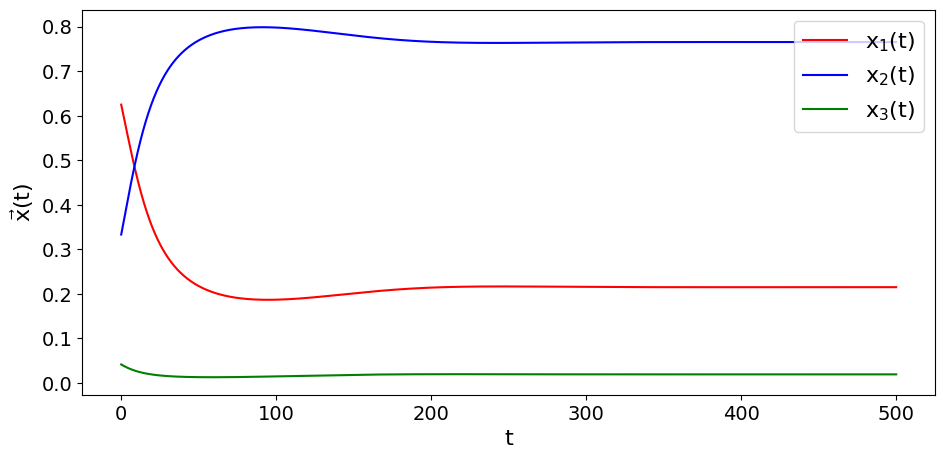

In [22]:
plt.xlabel(r"$\rm t$")
plt.ylabel(r"$\rm \vec{x}(t)$")
plt.plot(Loes.t, Loes.y[0],c="red", label=r"$\rm x_1(t)$");
plt.plot(Loes.t, Loes.y[1],c="blue", label=r"$\rm x_2(t)$");
plt.plot(Loes.t, Loes.y[2],c="green", label=r"$\rm x_3(t)$");
plt.legend(loc='upper right',fontsize=16);

Um die Lösung der evolutionären Spieltheorie mit den Lösungen der Räuber-Beute-Gleichung vergleichen zu können, substituieren wir den Populationsvektors $\vec{x}$ der Strategien mittels des folgenden Zusammenhanges in den Räuber-Beute Anzahlvektor $\vec{X}$:

\begin{equation}
X_i \, = \, \frac{x_i}{x_m} \nonumber
\end{equation}

In der unteren linken Abbildung stellen wir die simulierten Funktionen $X_i(t)$ dar. In der rechten Abbildung ist diese zeitliche Entwicklung im $X_2(X_1)$-Diagramm dargestellt (schwarze Kurve) und zusätzlich mit der ursprünglichen Räuber-Beute-Simulation (gelbe gepunktete Kurve) verglichen. Man erkennt, dass beide Simulationen bis auf eine Zeitstreckung exakt miteinander überein stimmen.

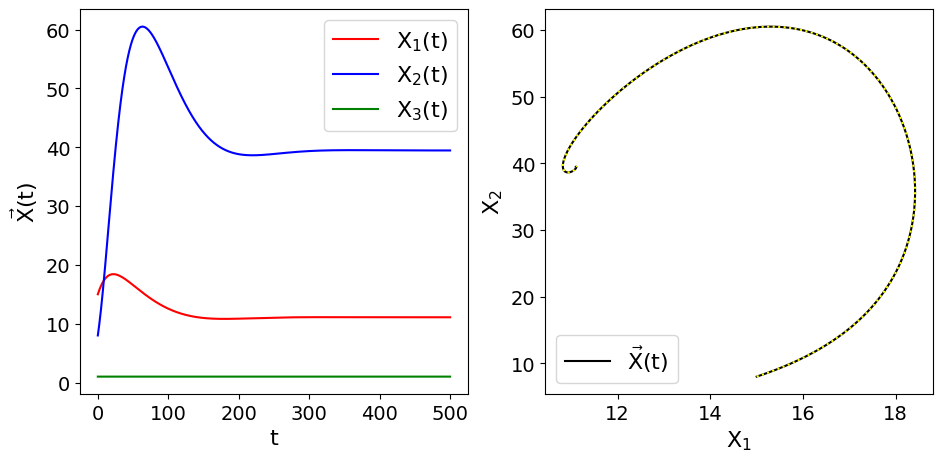

In [23]:
fig = plt.figure()
gs = gridspec.GridSpec(1, 2, width_ratios=[1,1], wspace=0.2)
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])

ax1.set_xlabel(r"$\rm t$")
ax1.set_ylabel(r"$\rm \vec{X}(t)$")
ax1.plot(Loes.t, Loes.y[0]/Loes.y[2],c="red", label=r"$\rm X_1(t)$");
ax1.plot(Loes.t, Loes.y[1]/Loes.y[2],c="blue", label=r"$\rm X_2(t)$");
ax1.plot(Loes.t, Loes.y[2]/Loes.y[2],c="green", label=r"$\rm X_3(t)$");
ax1.legend(loc='upper right',fontsize=16);

ax2.set_xlabel(r"$\rm X_1$")
ax2.set_ylabel(r"$\rm X_2$")
ax2.plot(Loes.y[0]/Loes.y[2], Loes.y[1]/Loes.y[2],c="black", label=r"$\rm \vec{X}(t)$");
ax2.plot(Loes_B1.y[0], Loes_B1.y[1],c="yellow",linestyle=":");
ax2.legend(loc='lower left',fontsize=16);

Wir betrachten nun das zweite Beispiel mit dem folgenden Parametersatz: Interaktionsmatrix $b_{ij}$ ($b_{11}=-0.01$, $b_{12}=-0.09$, $b_{21}=0.4$ und $b_{22}=-0.01$) und intrinsischen Reproduktion-Sterberaten ($r_1=0.8$ und $r_2=-0.5$).

In [24]:
r = [0.8,-0.5]
b = [[-0.01,-0.09],[0.4,-0.01]]
D = [[b[0][0],b[0][1],r[0]],[b[1][0],b[1][1],r[1]],[0,0,0]]
D

[[-0.01, -0.09, 0.8], [0.4, -0.01, -0.5], [0, 0, 0]]

Wir lösen wieder die Gleichungen der evolutionären Spieltheorie und vergleichen diese mit der Simulation der Räuber-Beute-Gleichung.

In [25]:
Loes = solve_ivp(DGLsys, [0, t_end], x_init, args=(D, ), t_eval=t_val, rtol=fehler, atol=fehler)

Die numerischen Lösungen der zeitlichen Entwicklung der Strategien stellen wir wieder grafisch dar:

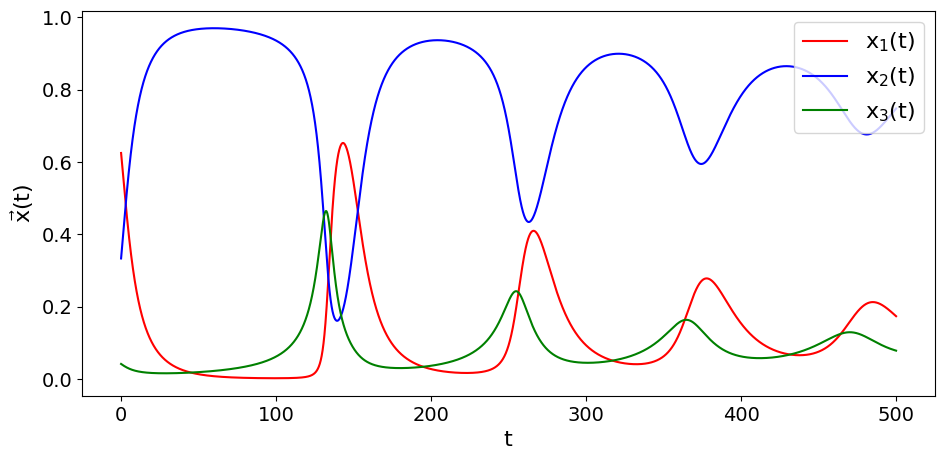

In [26]:
plt.xlabel(r"$\rm t$")
plt.ylabel(r"$\rm \vec{x}(t)$")
plt.plot(Loes.t, Loes.y[0],c="red", label=r"$\rm x_1(t)$");
plt.plot(Loes.t, Loes.y[1],c="blue", label=r"$\rm x_2(t)$");
plt.plot(Loes.t, Loes.y[2],c="green", label=r"$\rm x_3(t)$");
plt.legend(loc='upper right',fontsize=16);

Wir transformieren wieder den Populationsvektors $\vec{x}$ der Strategien in den Räuber-Beute Anzahlvektor $\vec{X}$ und vergleichen die numerische Lösung mit der ursprünglichen Räuber-Beute-Simulation (siehe rechte untere Abbildung). Man erkennt wieder, dass beide Simulationen bis auf eine Zeitstreckung exakt miteinander überein stimmen.

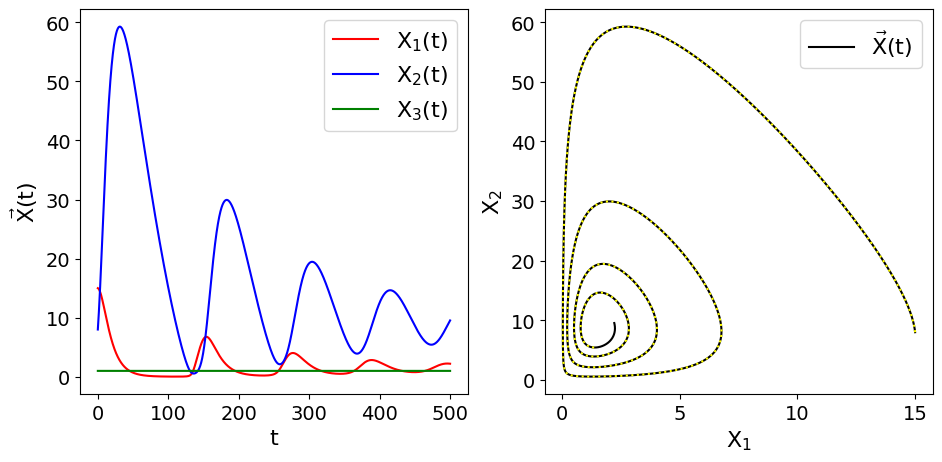

In [27]:
fig = plt.figure()
gs = gridspec.GridSpec(1, 2, width_ratios=[1,1], wspace=0.2)
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])

ax1.set_xlabel(r"$\rm t$")
ax1.set_ylabel(r"$\rm \vec{X}(t)$")
ax1.plot(Loes.t, Loes.y[0]/Loes.y[2],c="red", label=r"$\rm X_1(t)$");
ax1.plot(Loes.t, Loes.y[1]/Loes.y[2],c="blue", label=r"$\rm X_2(t)$");
ax1.plot(Loes.t, Loes.y[2]/Loes.y[2],c="green", label=r"$\rm X_3(t)$");
ax1.legend(loc='upper right',fontsize=16);

ax2.set_xlabel(r"$\rm X_1$")
ax2.set_ylabel(r"$\rm X_2$")
ax2.plot(Loes.y[0]/Loes.y[2], Loes.y[1]/Loes.y[2],c="black", label=r"$\rm \vec{X}(t)$");
ax2.plot(Loes_B2.y[0], Loes_B2.y[1],c="yellow",linestyle=":");
ax2.legend(loc='upper right',fontsize=16);